In [35]:
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt
import librosa
import python_speech_features as psf
import pyrubberband as pyrb
import math

[0.02680407 0.0339913  0.03171756 ... 0.00522042 0.00387386 0.        ]
0.71429396
-0.6114337


<function matplotlib.pyplot.show(*args, **kw)>

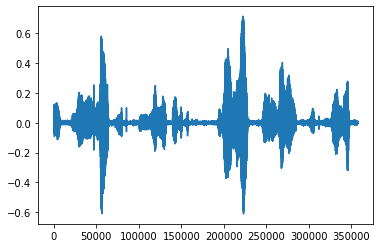

In [6]:
signal, rate = librosa.load("data/train/awake/awake_1.wav")
print(signal)
print(np.max(signal))
print(np.min(signal))

plt.plot(signal)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

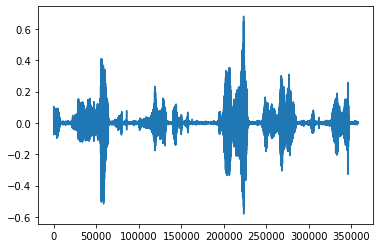

In [51]:
#shift pitch value between-5 and 10
signal_shift = pyrb.pitch_shift(signal, rate, -5)
wavfile.write("data/audio_exp/awake_1_1.wav", rate, signal_shift )
plt.plot(signal_shift)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

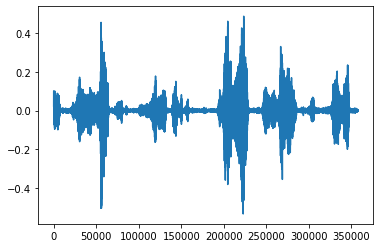

In [52]:
def manipulate_pitch(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

pitch_factor = 10
signal, rate = librosa.load("data/train/awake/awake_1.wav")
signal_shift = manipulate_pitch(signal, rate, pitch_factor)
wavfile.write("data/audio_exp/awake_1_3.wav", rate, signal_shift )
plt.plot(signal_shift)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

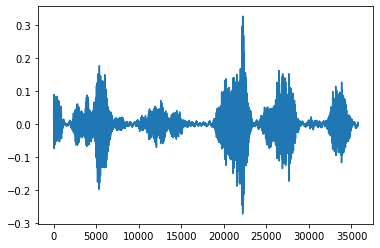

In [50]:
def manipulate_speed(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)
speed_factor = 10
signal, rate = librosa.load("data/train/awake/awake_1.wav")
signal_shift = manipulate_speed(signal, speed_factor)
wavfile.write("data/audio_exp/awake_1_3.wav", rate, signal_shift )
plt.plot(signal_shift)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

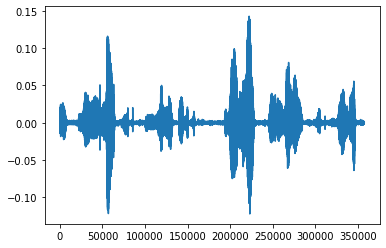

In [33]:
signal_big=np.clip(signal/5, -1, 1)
wavfile.write("data/audio_exp/awake_1_2.wav", rate, signal_big )
plt.plot(signal_big)
plt.show

[0.02680407 0.0339913  0.03171756 ... 0.00522042 0.00387386 0.        ]
0.71429396
-0.6114337


0.06053853654304999


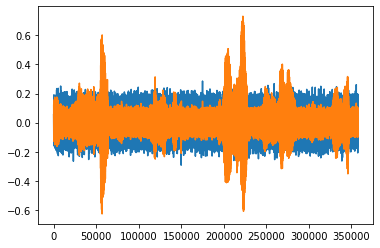

In [46]:
signal, rate = librosa.load("data/train/awake/awake_1.wav")
RMS=math.sqrt(np.mean(signal**2))
noise=np.random.normal(0, RMS, signal.shape[0])
plt.plot(noise)
plt.show
noise_energy = np.sqrt(noise.dot(noise) / noise.size)
print(noise_energy)
data_energy = np.sqrt(signal.dot(signal) / signal.size)
coeff = 0.5
signal += coeff * noise * data_energy / noise_energy
plt.plot(signal)
plt.show
wavfile.write("data/audio_exp/awake_1_2.wav", rate, signal )